In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
from sklearn.mixture import GaussianMixture

In [2]:
class learn_model:
    
    def __init__(self,state_dim,control_dim):
        self.gmm = GaussianMixture(n_components=1)
        self.state_dim = state_dim
        self.control_dim = control_dim
        
        self.A = np.eye(state_dim)
        self.B = np.zeros((state_dim,control_dim))
        self.Sigma = np.eye(state_dim)
        
    def update_model(self,x,u):
        
        state_action_pairs = np.hstack((np.array(x)[1:],np.array(u)[1:],np.array(x)[0:-1]))
        d = self.state_dim
        
        gmm = self.gmm.fit(np.random.permutation(state_action_pairs))
        
        mu_a = gmm.means_[:,0:d]
        mu_b = gmm.means_[:,d:]

        cov_aa = gmm.covariances_[:,0:d,0:d]
        cov_ab = gmm.covariances_[:,0:d,d:]
        cov_ba = gmm.covariances_[:,d:,0:d]
        cov_bb = gmm.covariances_[:,d:,d:]

        M = cov_ab[0,:,:].dot(np.linalg.inv(cov_bb[0,:,:]))

        self.A = M[:,-d:]
        self.B = M[:,0:-d]
        
        self.Sigma = cov_aa[0,:,:] - (M.dot(cov_bb[0,:,:])).dot(M.T)

    def dynamics(self,x,u):
        
        return self.A.dot(x) + self.B.dot(u)

In [3]:
# Test model learner

A = np.random.randn(2,2)

B = np.array(((0,),(0.1,)))
N = 10000

x = [np.zeros((2,1))]
u = [np.array(np.random.randn(1,1))]
for j in range(N):
    y = A.dot(x[-1]) + B.dot(u[-1])
    x.append(y)
    u.append(np.array(np.random.randn(1,1)))

In [4]:
model_learner = learn_model(2,1)

In [5]:
model_learner.update_model(np.squeeze(np.array(x)),np.array(u).reshape(-1,1))

In [6]:
y = [x[0]]
for j in range(N):
    y.append(model_learner.dynamics(y[-1],u[j]))

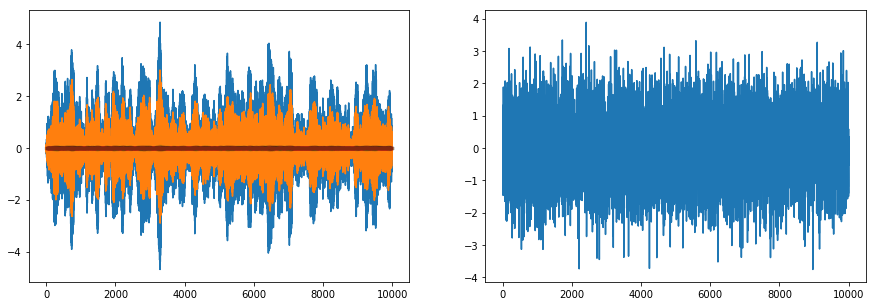

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.squeeze(np.array(x)))
plt.plot(np.squeeze(np.array(y)),'.',alpha=0.01)
plt.subplot(1,2,2)
plt.plot(np.squeeze(np.array(u)))
#plt.plot(np.squeeze(np.array(u)))
plt.show()

In [8]:
print(A)
print(model_learner.A)
print(B)
print(model_learner.B)

[[ 0.62677191  1.96173593]
 [-0.69484798 -0.59598114]]
[[ 0.62677013  1.96173134]
 [-0.69507572 -0.59727469]]
[[0. ]
 [0.1]]
[[1.23831956e-08]
 [1.38925299e-03]]
